# Web Scrapping

### Objectives

- Extract necessary information from a given web site.
- Create appropriate visualizations on the collected data..

#### Extract information from the given web site

In [1]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

Import the required libraries

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

Download the webpage at the url

In [3]:
data = requests.get(url).text

Create a soup object

In [4]:
soup = BeautifulSoup(data,"html.parser")

Scrape the Language name and annual average salary.

In [5]:
table = soup.find('table')
count = 0
popular_lang_salary = []
for row in table.find_all('tr'):
    count += 1
    cols = row.find_all('td')
    language_name = cols[1].getText()
    avg_salary = cols[3].getText()
    if count == 1:
        continue
    avg_salary = int(avg_salary[1:].replace(',',''))
    popular_lang_salary.append({'Language': language_name, 'Avg Salary': avg_salary})
popular_lang_salary

[{'Language': 'Python', 'Avg Salary': 114383},
 {'Language': 'Java', 'Avg Salary': 101013},
 {'Language': 'R', 'Avg Salary': 92037},
 {'Language': 'Javascript', 'Avg Salary': 110981},
 {'Language': 'Swift', 'Avg Salary': 130801},
 {'Language': 'C++', 'Avg Salary': 113865},
 {'Language': 'C#', 'Avg Salary': 88726},
 {'Language': 'PHP', 'Avg Salary': 84727},
 {'Language': 'SQL', 'Avg Salary': 84793},
 {'Language': 'Go', 'Avg Salary': 94082}]

Store the data in a dataframe

In [6]:
popular_lang_salary_df = pd.DataFrame(data=popular_lang_salary)
popular_lang_salary_df

,Language,Avg Salary
0,Python,114383
1,Java,101013
2,R,92037
3,Javascript,110981
4,Swift,130801
5,C++,113865
6,C#,88726
7,PHP,84727
8,SQL,84793
9,Go,94082


#### Create a bar chart showing the Annual Average Salary by Programming Languages

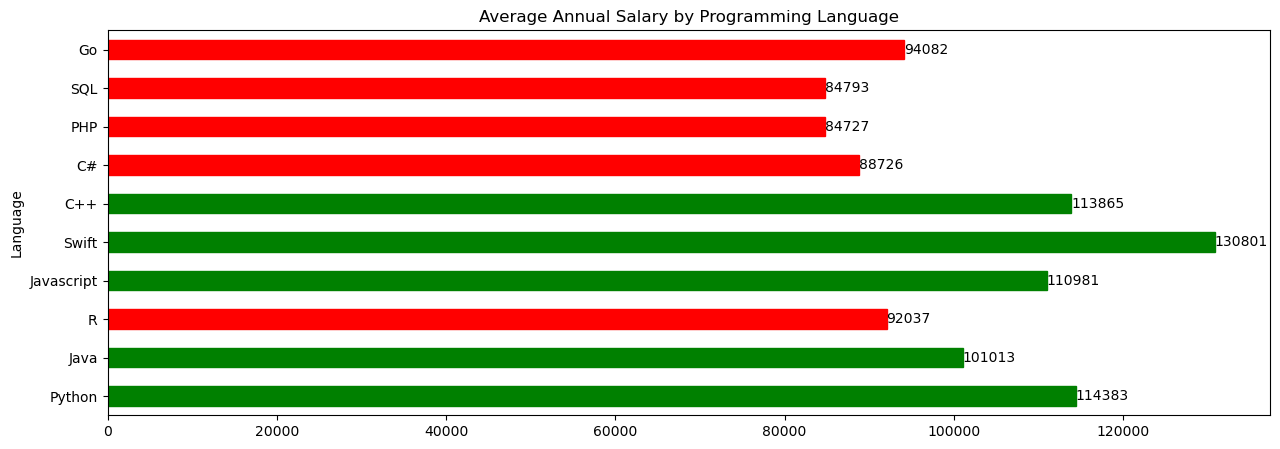

In [7]:
ax = popular_lang_salary_df.plot.barh(y='Avg Salary',x='Language',legend=False,figsize=[15,5],title='Average Annual Salary by Programming Language')
ax.bar_label(ax.containers[0])
index_above = popular_lang_salary_df[popular_lang_salary_df['Avg Salary']>=100000]
for idx in popular_lang_salary_df.index:
    if idx in index_above.index:
        ax.patches[idx].set_color('green')
    else:
        ax.patches[idx].set_color('red')